In [143]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import norm
from yahoofinancials import YahooFinancials

#Selecting Stocks
Stocks = "RUN VSLR ENPH IBDRY VWDRY GCTAY DNNGY JKS CSIQ FSLR REGI SPWR"

#Creating the portfolio of the stocks by using yahoofinancials.

Portfolio = yf.download(Stocks ,
                start='2020-01-01', 
                end='2020-10-15')

#Adding Symbol to the columns from rows

portfolio = Portfolio.stack().reset_index().rename(index=str, columns={"level_1": "Symbol"}).sort_values(['Symbol','Date'])
portfolio['Return'] = (portfolio['Close'] - portfolio['Open'])/portfolio['Open']


#portfolio.to_excel("Portfolio.xlsx")


[*********************100%***********************]  12 of 12 completed


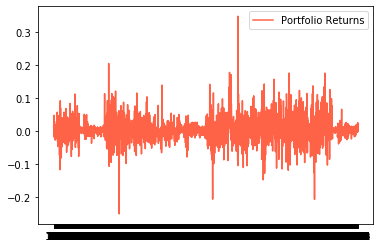

volatility:  0.037%
mean:  0.004%


In [144]:
# Plot the price returns
plt.plot(portfolio['Return'], color = 'Tomato',label = 'Portfolio Returns')
plt.legend(loc='upper right')
plt.show()

# Calculate daily std of returns
SST = portfolio['Return'].std()
print('volatility: ', '{:.3f}%'.format(SST))
# Calculate daily mean of returns
SMN = portfolio['Return'].mean()
print('mean: ', '{:.3f}%'.format(SMN))


In [145]:
Stock_Return_Each = pd.pivot_table(portfolio,index=['Symbol'], values = ['Return','Close','Open']).reset_index()
print(Stock_Return_Each)

   Symbol      Close       Open    Return
0    CSIQ  22.464050  22.391850  0.002628
1   DNNGY  39.258445  39.151850  0.002944
2    ENPH  53.394900  53.164900  0.005140
3    FSLR  54.121450  54.046400  0.001751
4   GCTAY   3.826700   3.826250  0.000102
5   IBDRY  45.187000  45.131000  0.001334
6     JKS  21.737700  21.518900  0.005046
7    REGI  30.120100  30.038150  0.003202
8     RUN  28.672850  28.434130  0.007818
9    SPWR   6.589582   6.562352  0.003873
10   VSLR  14.770867  14.602398  0.007886
11  VWDRY  37.355200  37.284500  0.001661


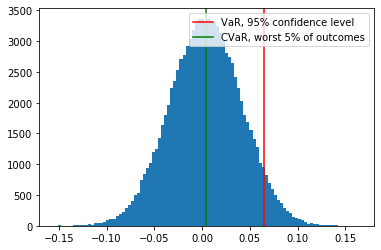

95% VaR is:  0.065%


In [146]:
#VaR Calculation
VaR_90 = norm.ppf(0.90, loc =mean, scale=std)
VaR_95 = norm.ppf(0.95, loc =mean, scale=std)
VaR_99 = norm.ppf(0.99, loc =mean, scale=std)

tail_loss = norm.expect(lambda x: x, loc = mean, scale = std, lb = VaR_95)
CVaR_95 = (1 / ( 0.95)) * tail_loss

plt.hist(norm.rvs(size = 100000, loc = mean, scale = std), bins = 100)
plt.axvline(x = VaR_95, c='r', label = "VaR, 95% confidence level")
plt.axvline(x = CVaR_95, c='g', label = "CVaR, worst 5% of outcomes")
plt.legend(); plt.show()

print('95% VaR is: ', '{:.3f}%'.format(VaR_95))